In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

This project follows the analysis from

https://nicholastsmith.wordpress.com/2016/04/19/stock-market-prediction-using-multi-layer-perceptrons-with-tensorflow/

In [6]:
df = pd.read_csv('BA_all.csv', parse_dates=['Date'])

In [9]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15680 entries, 0 to 15679
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       15680 non-null  datetime64[ns]
 1   Open       15680 non-null  float64       
 2   High       15680 non-null  float64       
 3   Low        15680 non-null  float64       
 4   Close      15680 non-null  float64       
 5   Adj Close  15680 non-null  float64       
 6   Volume     15680 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 857.6 KB


,Date,Open,High,Low,Close,Adj Close,Volume
0,1962-01-02,0.837449,0.837449,0.823045,0.823045,0.190931,352350
1,1962-01-03,0.835391,0.851852,0.835391,0.839506,0.194750,710775
2,1962-01-04,0.839506,0.853909,0.831276,0.831276,0.192840,911250
3,1962-01-05,0.831276,0.835391,0.792181,0.814815,0.189022,880875
4,1962-01-08,0.814815,0.829218,0.804527,0.816872,0.189499,473850
...,...,...,...,...,...,...,...
15675,2024-04-11,174.470001,174.699997,171.380005,173.360001,173.360001,7625100
15676,2024-04-12,172.199997,173.240005,169.369995,169.550003,169.550003,7548900
15677,2024-04-15,170.740005,171.179993,167.529999,167.820007,167.820007,6490700
15678,2024-04-16,168.139999,170.639999,167.750000,170.550003,170.550003,7976300


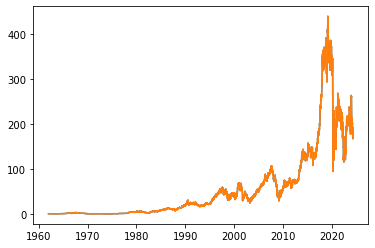

In [16]:
plt.plot(df['Date'], df['Close'])
plt.plot('Date', 'Close', data = df)

In [18]:
def return_moving(d0:float, d1:float) : 
    #return 'meaningful price change'
    w = (d1 - d0)/d0
    if w < -0.005 : 
        return -1
    elif w > 0.005 : 
        return 1 
    else :
        return 0

In [20]:
#전략 1

money = 0
for i in range(1, len(df) - 1) :
    k = return_moving(df['Close'][i-1], df['Close'][i])
    if k == 1 :
        money += (df['Open'][i+1] - df['Close'][i+1])
    elif k == -1 :
        money += (df['Close'][i+1] - df['Open'][i+1])
    else : 
        pass
print(money)

-16.734982000000443


In [21]:
#전략 2

money = 0
for i in range(1, len(df) - 1) :
    k = return_moving(df['Close'][i-1], df['Close'][i])
    if k == 1 :
        money += (df['Open'][i+1] - df['Close'][i+1])
    else : 
        pass
print(money)

51.933443999999554


In [22]:
def return_moving2(d0:float, d1:float) : 
    #return 'meaningful price change'
    w = (d1 - d0)/d0
    if w < -0.003 : 
        return -1
    elif w > 0.003 : 
        return 1 
    else :
        return 0

In [23]:
#전략 3

money = 0
for i in range(1, len(df) - 1) :
    k = return_moving2(df['Close'][i-1], df['Close'][i])
    if k == 1 :
        money += (df['Open'][i+1] - df['Close'][i+1])
    else : 
        pass
print(money)

46.22404999999975


93.90517599999981
